## Some more on ```spaCy``` and ```pandas```

First we want to import some of the packages we need.

In [ ]:
import os
import spacy

# Remember we need to initialise spaCy
nlp = spacy.load("en_core_web_sm")

We can inspect this object and see that it's what we've been called a ```spaCy``` object. 

In [ ]:
type(nlp)

We use this ```spaCy``` object to create annotated outputs, what we call a ```Doc``` object.

In [ ]:
example = "This is a sentence written in English"

In [ ]:
doc = nlp(example)

In [ ]:
type(doc)

```Doc``` objects are sequences of tokens, meaning we can iterate over the tokens and output specific annotations that we want such as POS tag or lemma.

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.tag_, token.lemma_)

__Reading data with ```pandas```__

```pandas``` is the main library in Python for working with DataFrames. These are tabular objects of mixed data types, comprising rows and columns.

In ```pandas``` vocabulary, a column is called a ```Series```, which is like a sophisticated list. I'll be using the names ```Series``` and column pretty interchangably.

In [25]:
import pandas as pd

In [26]:
in_file = os.path.join("..", "data", "labelled_data", "fake_or_real_news.csv")

In [27]:
data = pd.read_csv(in_file)

We can use ```.sample()``` to take random samples of the dataframe.

In [28]:
data.sample(5)

,Unnamed: 0,title,text,label
2840,8325,Trump to deport everyone who is not Native Ame...,Trump to deport everyone who is not Native Ame...,FAKE
461,9444,"Neighbors Smell Smoke At Muslim Home, What The...","Share This Abdul Barati, a 43-yera-old Afghan ...",FAKE
2731,8885,World Markets Rally with Glee After Hillary Em...,World Markets Rally with Glee After Hillary Em...,FAKE
4110,8619,Iraqis in Mosul Find US Missiles at Captured I...,"By Kurt Nimmo, Blacklisted News The Iraqis fou...",FAKE
5758,560,Education Secretary Arne Duncan stepping down,"""He's done more to bring our education system ...",REAL


To delete unwanted columns, we can do the following:

In [29]:
del data["Unnamed: 0"]

In [31]:
type(data["label"])

pandas.core.series.Series

We can count the distribution of possible values in our data using ```.value_counts()``` - e.g. how many REAL and FAKE news entries do we have in our DataFrame?

In [ ]:
data["label"].value_counts()

__Filter on columns__

To filter on columns, we define a condition on which we want to filter and use that to filer our DataFrame. We use the square-bracket syntax, just as if we were slicing a list or string.

In [ ]:
data["label"]=="FAKE"

In [ ]:
data["label"]=="REAL"

Here we create two new dataframes, one with only fake news text, and one with only real news text.

In [ ]:
fake_news_df = data[data["label"]=="FAKE"]
real_news_df = data[data["label"]=="REAL"]

In [ ]:
fake_news_df["label"].value_counts()

In [ ]:
real_news_df["label"].value_counts()

__Counters__

In the following cell, you can see how to use a 'counter' to count how many entries are in a list.

The += operator adds 1 to the variable ```counter``` for every entry in the list.

In [ ]:
counter = 0
test_list = range(0,100)

for entry in test_list:
    counter += 1

__Counting features in data__

Using the same logic, we can count how often adjectives (```JJ```) appear in our data. 

This is useful from a lingustic perspective; we could now, for example, figure out how many of each part of speech can be found in our data.

In [ ]:
# create counters
adj_count = 0

# process texts in batch
for doc in nlp.pipe(fake_news_df["title"], batch_size=500):
    for token in doc:
        if token.tag_ == "JJ":
            adj_count += 1

In this case, we're using ```nlp.pipe``` from ```spaCy``` to group the entries together into batches of 500 at a time.

Why?

Everytime we execute ```nlp(text)``` it incurs a small computational overhead which means that scaling becomes an issue. An overhead of 0.01s per document becomes an issue when dealing with 1,000,000 or 10,000,000 or 100,000,000...

If we batch, we can therefore be a bit more efficient. It also allows us to keep our ```spaCy``` logic compact and together, which becomes useful for more complex tasks.

In [ ]:
print(adj_count)

## Sentiment with ```spaCy```

To work with spaCyTextBlob, we need to make sure that we are working with ```spacy==2.3.5```. 

Follow the separate instructions posted to Slack to make this work.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
# initialise spacy
nlp = spacy.load("en_core_web_sm")

Here, we initialise spaCyTextBlob and add it as a new component to our ```spaCy``` nlp pipeline.

In [2]:
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

Let's test spaCyTextBlob on a single text, specifically Virgian Woolf's _To The Lighthouse_, published in 1927.

In [ ]:
text_file = os.path.join("..", "data", "100_english_novels", "corpus", "Woolf_Lighthouse_1927.txt")

In [7]:
with open(text_file, "r", encoding="utf-8") as file:
    text = file.read()

In [9]:
print(text[:1000])

﻿To the Lighthouse


THE WINDOW


1


"Yes, of course, if it's fine tomorrow," said Mrs. Ramsay. "But you'll
have to be up with the lark," she added.

To her son these words conveyed an extraordinary joy, as if it were
settled, the expedition were bound to take place, and the wonder to which
he had looked forward, for years and years it seemed, was, after a night's
darkness and a day's sail, within touch. Since he belonged, even at the
age of six, to that great clan which cannot keep this feeling separate
from that, but must let future prospects, with their joys and sorrows,
cloud what is actually at hand, since to such people even in earliest
childhood any turn in the wheel of sensation has the power to crystallise
and transfix the moment upon which its gloom or radiance rests, James
Ramsay, sitting on the floor cutting out pictures from the illustrated
catalogue of the Army and Navy stores, endowed the picture of a
refrigerator, as his mother spoke, with heavenly bliss. It was fringe

We use ```spaCy``` to create a ```Doc``` object for the entire text (how might you do this in batch?)

In [10]:
doc = nlp(text)

We can extract the polarity for each sentence in the novel and create list of scores per sentence.

In [11]:
polarity = []

for sentence in doc.sents:
    score = sentence._.sentiment.polarity
    polarity.append(score)

In [12]:
polarity[:10]

[0.0,
 0.0,
 0.4166666666666667,
 0.0,
 0.5666666666666667,
 0.4,
 -0.18333333333333332,
 0.8,
 0.4,
 0.0006926406926406867]

We can create a quick and cheap plot using matplotlib - this is only fine in Jupyter Notebooks, don't do this in the wild!

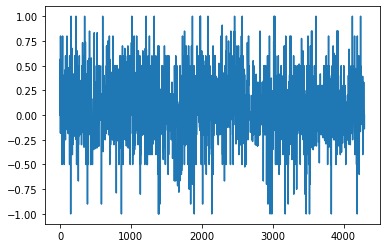

In [16]:
plt.plot(polarity)

We can the use some fancy methods from ```pandas``` to calculate a rolling mean over a certain window length.

For example, we group together our polarity scores into a window of 100 sentences at a time and calculate an average on that window.

In [23]:
smoothed_sentiment = pd.Series(polarity).rolling(100).mean()

This plot with a rolling average shows us a 'smoothed' output showing the rolling average over time, helping to cut through the noise.

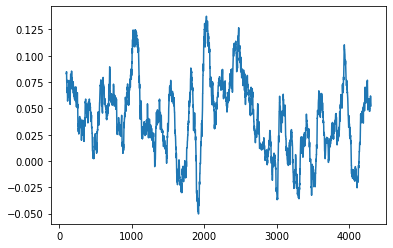

In [24]:
plt.plot(smoothed_sentiment)